# Optimization 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def f(x):
    return x * (x - 2) * (x + 2) * (x + 2)

def GSS(a,b):
    R    = 0.618
    TOL  = 10**(-4) 
    x1  = b - R * (b - a)
    x2  = a + R * (b - a)
    f1  = f(x1)
    f2  = f(x2)
    if(f1 > f2):
        GSS(x1, b)
    if(f1 < f2):
        GSS(a, x2)
    if((b - a) < TOL):
        print(b)

In [52]:
GSS(0,2)

1.2807764530112111
1.2807765128112563
1.2807765128112563
1.2807766693870282
1.2807769227458823
1.2807769227458823
1.2807775861209365
1.2807786595433543
1.2807786595433543
1.280781470108854
1.2807860179494683
1.2807860179494683
1.2807979256604638
1.2808171938012334
1.2808171938012334


In [53]:
GSS(-3,0)

-1.9999999999999998
-1.9999999999999993
-1.9999999999999987
-1.9999999999999987
-1.999999999999997
-1.999999999999997
-1.9999999999999927
-1.9999999999999858
-1.9999999999999858
-1.9999999999999674
-1.9999999999999376
-1.9999999999999376
-1.9999999999998597
-1.9999999999998597
-1.9999999999998597
-1.9999999999995297
-1.9999999999995297
-1.9999999999995297
-1.9999999999981317
-1.9999999999981317
-1.999999999994471
-1.9999999999885478
-1.9999999999885478
-1.999999999973039
-1.999999999973039
-1.9999999999324312
-1.9999999999324312
-1.9999999998261073
-1.9999999998261073
-1.9999999995477167
-1.9999999990972466
-1.9999999990972466
-1.9999999979177707
-1.9999999979177707
-1.9999999948295233
-1.9999999948295233
-1.9999999948295233
-1.9999999817453384
-1.9999999817453384
-1.9999999474867298
-1.9999999474867298
-1.999999857786662
-1.999999857786662
-1.999999857786662
-1.9999994777483807
-1.9999994777483807
-1.9999994777483807
-1.9999978676147538
-1.9999978676147538
-1.9999936517665045
-1.99998

(-3, 3)

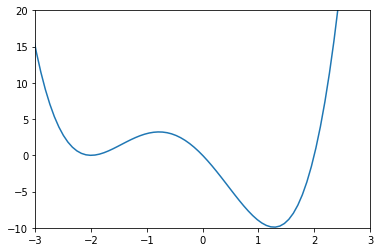

In [23]:
t = np.linspace(-5,3,100)
plt.plot(t, f(t))
plt.ylim(-10,20)
plt.xlim(-3,3)

In [57]:
import scipy.optimize as opt

res1 = opt.minimize_scalar(f,method='Golden')
print(res1)

res2 = opt.minimize_scalar(f,method='Brent')
print(res2)

res3 = opt.minimize_scalar(f, bounds=(-3,-1), method='bounded')
print(res3)

     fun: -9.914949590828149
    nfev: 43
     nit: 38
 success: True
       x: 1.2807764058358122
     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040355971
     fun: 3.283651798497857e-13
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: -2.000000202597239


In [71]:
def f(x):
    return (-4) * np.sin(x) * (1 + np.cos(x))
def df(x):
    return (-4) * (np.cos(x) * (1 + np.cos(x)) - np.sin(x) * np.sin(x))
def ddf(x):
    return 4 * np.sin(x) * (1 + 4 * np.cos(x))

def New(x,cnt):
    TOL = 10**(-5)
    y   = x - df(x)/ddf(x)
    if (np.abs(x - y) < TOL):
        print(x, cnt)
    else :
        cnt = cnt + 1
        New(y, cnt)

In [80]:
New(0.5,0)

1.0471904199831747 3


-2 2
-1 3
-1 1
1 -3
1 1
1 1


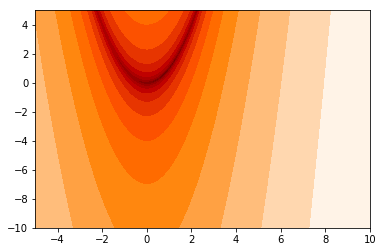

In [108]:
def hessian_grad(x):
    H = [[-400 * x[1] + 1200 * x[0] * x[0] + 2, -400 * x[0]], [-400 * x[0], 200]]
    df = [-400 * x[0] * (x[1] - x[0] * x[0]) - 2 * (1 - x[0]), 200 * (x[1] - x[0] * x[0])]
    return H, df

x = np.array([-2,2])
s = np.zeros(2)

err, TOL = 1, 10**(-5)

xc ,yc = [x[0]], [x[1]]

while (err > TOL):
    H, df = hessian_grad(x)
    
    det = H[0][0] * H[1][1] - H[1][0] * H[0][1]
    s[0] = (H[1][0] * df[1] - H[1][1] * df[0]) / det
    s[1] = (H[0][1] * df[0] - H[0][0] * df[1]) / det
    
    err = np.sqrt(s[0] * s[0] + s[1] * s[1])
    x[0] = x[0] + s[0]
    x[1] = x[1] + s[1]
    
    xc = np.append(xc, x[0])
    yc = np.append(yc, x[1])

for i in range(0,6):
    print(xc[i], yc[i])
    
x = np.linspace(-5,10,400)
y = np.linspace(-10,5,400)
X, Y = np.meshgrid(x,y)

E = np.log10(100*(Y-X*X)**2+(1-X)**2)
dmax = np.max(E)
dmin = -3

levels=(dmax - dmin)*np.arange(20)/19 + dmin

cmap = plt.cm.jet
cmap = plt.cm.gist_heat

con = plt.contourf(x, y, E, levels, cmap=cmap)